In [5]:
import os
import pandas as pd
import seaborn as sns

def get_files(path = "../results/training_CNN_v2_lr3/"):

    file_suffix = ".csv"
    dir_list = os.listdir(path)
    dir_list = [f'{path}/{file}' for file in dir_list if file_suffix in file]
    print(f'{len(dir_list)=}')

    return dir_list


def read_series_csv(path):


    df = pd.read_csv(path, skiprows=1, header = None)                 # two columns: index, value [web:31]
    if df.shape[1] == 2:
        df = df.set_index(0).T                       # index to columns, values to a single row [web:63]
        df.columns.name = None

    return df



def get_avg(path, id_cols = ["phenotype","model_name","kmer_prefix","kmer_suffix_size"]):
    df = pd.concat((read_series_csv(path) for path in get_files(path)))


    
    metric_cols = [
        "f1_score_weighted","f1_score_macro","precision_weighted","precision_macro",
        "recall_weighted","recall_macro","accuracy","balanced_accuracy","auc_weighted","auc_macro"
    ]

    df[metric_cols] = df[metric_cols].apply(pd.to_numeric)

    df["kmer_suffix_size"] = df["kmer_suffix_size"].apply(pd.to_numeric)


    avg_by_config = (
        df
        .groupby(id_cols, as_index=False)[metric_cols]
        .mean()
    )
    return avg_by_config

# def get_max_avg(path, id_cols = ["phenotype","model_name","kmer_prefix","kmer_suffix_size"], get_max = "learning_rate"):
#     metric_cols = [
#         "f1_score_weighted","f1_score_macro","precision_weighted","precision_macro",
#         "recall_weighted","recall_macro","accuracy","balanced_accuracy","auc_weighted","auc_macro"
#     ]
#     df = pd.concat((read_series_csv(path) for path in get_files(path)))

#     df[metric_cols] = df[metric_cols].apply(pd.to_numeric)
    
#     avg_by_config = (
#         df
#         .groupby(id_cols.append(get_max), as_index=False)[metric_cols]
#         .mean()
#     ).groupby()

  


#     return max_by_config
     


len(dir_list)=159


<Axes: title={'center': 'F1 score weighted - fixed learning rate = 0.001'}, xlabel='Kmer Suffix Size', ylabel='Kmer Prefix'>

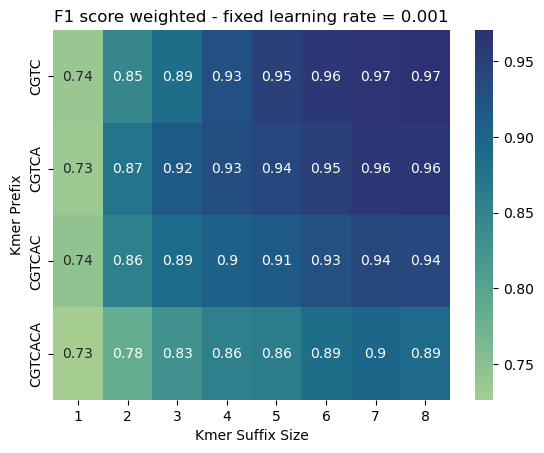

In [ ]:

# https://seaborn.pydata.org/generated/seaborn.heatmap.html

heat = get_avg(path = "../results/training_CNN_v2_lr3/").pivot(index = "kmer_prefix", columns="kmer_suffix_size", values = "f1_score_weighted")
ax = sns.heatmap(heat, annot = True, cmap="crest")
ax.set(xlabel="Kmer Suffix Size", ylabel="Kmer Prefix", title ="F1 score weighted - fixed learning rate = 0.001")


ax



In [75]:
get_avg(id_cols = ["phenotype","model_name","kmer_prefix","kmer_suffix_size","learning_rate"],path = "../results/training_CNN_v2_lr_variable/").groupby(["phenotype","model_name","kmer_prefix","kmer_suffix_size"], as_index = False).max(["balanced_accuracy"])

len(dir_list)=72


,phenotype,model_name,kmer_prefix,kmer_suffix_size,f1_score_weighted,f1_score_macro,precision_weighted,precision_macro,recall_weighted,recall_macro,accuracy,balanced_accuracy,auc_weighted,auc_macro
0,madin_categorical_gram_stain,CNN,CGTCA,1,0.729727,0.727659,0.778258,0.745774,0.728211,0.751314,0.728211,0.751314,0.847057,0.847499
1,madin_categorical_gram_stain,CNN,CGTCA,3,0.897877,0.893597,0.900651,0.894560,0.898020,0.899535,0.898020,0.899535,0.965646,0.965671
2,madin_categorical_gram_stain,CNN,CGTCA,5,0.943231,0.940894,0.943660,0.940835,0.943199,0.941379,0.943199,0.941379,0.984388,0.984345
3,madin_categorical_gram_stain,CNN,CGTCA,7,0.958174,0.956328,0.958368,0.958313,0.958259,0.954649,0.958259,0.954649,0.988886,0.988976
4,madin_categorical_gram_stain,CNN,CGTCAC,1,0.734055,0.725022,0.748637,0.735180,0.735207,0.730890,0.735207,0.730890,0.820215,0.820216
5,madin_categorical_gram_stain,CNN,CGTCAC,2,0.854062,0.847472,0.855349,0.851232,0.854619,0.849940,0.854619,0.849940,0.928654,0.928672
6,madin_categorical_gram_stain,CNN,CGTCACA,1,0.739115,0.727973,0.747307,0.737583,0.741136,0.729153,0.741136,0.729153,0.820940,0.820754
7,madin_categorical_gram_stain,CNN,CGTCACA,2,0.782037,0.775131,0.788769,0.774466,0.781335,0.781348,0.781335,0.781348,0.873115,0.873293


In [14]:
get_avg(id_cols = ["phenotype","model_name","kmer_prefix","kmer_suffix_size","learning_rate"],
               path = "../results/training_CNN_v2_lr_variable/"
                )

len(dir_list)=86


,phenotype,model_name,kmer_prefix,kmer_suffix_size,learning_rate,f1_score_weighted,f1_score_macro,precision_weighted,precision_macro,recall_weighted,recall_macro,accuracy,balanced_accuracy,auc_weighted,auc_macro
0,madin_categorical_gram_stain,CNN,CGTC,1,0.0001,0.715099,0.710089,0.737491,0.715623,0.712202,0.724610,0.712202,0.724610,0.773475,0.773373
1,madin_categorical_gram_stain,CNN,CGTC,1,0.001,0.714252,0.711564,0.758405,0.730123,0.712558,0.735875,0.712558,0.735875,0.803132,0.802756
2,madin_categorical_gram_stain,CNN,CGTC,1,0.01,0.662263,0.667458,0.778942,0.738449,0.669335,0.717040,0.669335,0.717040,0.769119,0.769053
3,madin_categorical_gram_stain,CNN,CGTCA,1,0.0001,0.729727,0.726315,0.762609,0.739075,0.728211,0.745239,0.728211,0.745239,0.844094,0.844508
4,madin_categorical_gram_stain,CNN,CGTCA,1,0.001,0.729625,0.727659,0.772393,0.745774,0.728211,0.751314,0.728211,0.751314,0.847057,0.847499
5,madin_categorical_gram_stain,CNN,CGTCA,1,0.01,0.677743,0.681940,0.778258,0.742820,0.684335,0.725098,0.684335,0.725098,0.813010,0.812730
6,madin_categorical_gram_stain,CNN,CGTCA,2,0.0001,0.775999,0.773535,0.812005,0.786326,0.774220,0.795627,0.774220,0.795627,0.897359,0.897630
7,madin_categorical_gram_stain,CNN,CGTCA,2,0.001,0.839028,0.835048,0.851756,0.834089,0.837424,0.847646,0.837424,0.847646,0.931409,0.931299
8,madin_categorical_gram_stain,CNN,CGTCA,2,0.01,0.871062,0.864599,0.875859,0.875879,0.872406,0.860271,0.872406,0.860271,0.947281,0.947277
9,madin_categorical_gram_stain,CNN,CGTCA,3,0.0001,0.870236,0.866709,0.879851,0.864511,0.869086,0.877774,0.869086,0.877774,0.947408,0.947457


len(dir_list)=201


<Axes: title={'center': 'CNN F1 score weighted - avg of best model - var learning rate'}, xlabel='Kmer Suffix Size', ylabel='Kmer Prefix'>

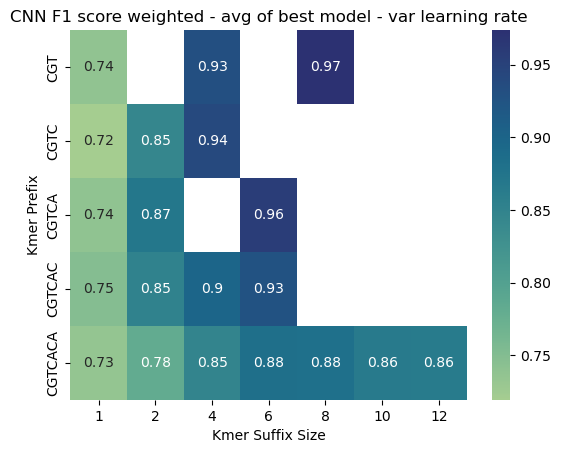

In [71]:
import seaborn as sns
# https://seaborn.pydata.org/generated/seaborn.heatmap.html

# desired: show average accuracy for best learning rate for each combination

heat = get_avg(id_cols = ["phenotype","model_name","kmer_prefix","kmer_suffix_size","learning_rate"],
               path = "../results/training_CNN_v2_lr_variable/"
                ).groupby(["phenotype","model_name","kmer_prefix","kmer_suffix_size"], as_index = False
                ).max(["f1_score_weighted"]
                ).pivot(index = "kmer_prefix", columns="kmer_suffix_size", values = "f1_score_weighted").sort_index(level=1, ascending =True, inplace = False)
heat
ax = sns.heatmap(heat, annot = True, cmap="crest")
ax.set(xlabel="Kmer Suffix Size", ylabel="Kmer Prefix", title ="CNN F1 score weighted - avg of best model - var learning rate")


ax

# remove 3,5,7,9 results

len(dir_list)=138


<Axes: title={'center': 'RNN F1 score weighted - avg of best model - var learning rate'}, xlabel='Kmer Suffix Size', ylabel='Kmer Prefix'>

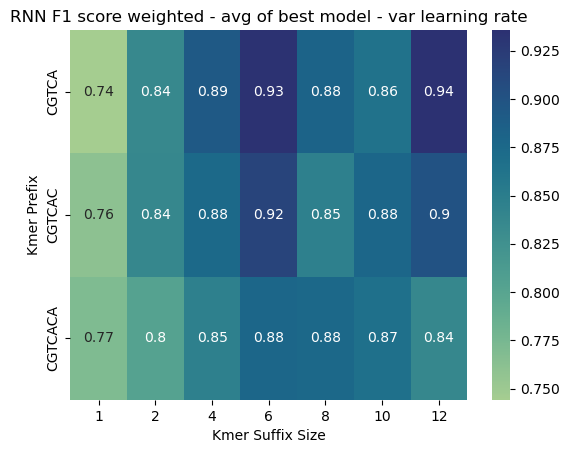

In [ ]:

# https://seaborn.pydata.org/generated/seaborn.heatmap.html

# desired: show average accuracy for best learning rate for each combination

heat = get_avg(id_cols = ["phenotype","model_name","kmer_prefix","kmer_suffix_size","learning_rate"],
               path = "../results/training_RNN_lr_variable/"
                ).groupby(["phenotype","model_name","kmer_prefix","kmer_suffix_size"], as_index = False
                ).max(["f1_score_weighted"]
                ).pivot(index = "kmer_prefix", columns="kmer_suffix_size", values = "f1_score_weighted").sort_index(level=1, ascending =True, inplace = False)
ax = sns.heatmap(heat, annot = True, cmap="crest")
ax.set(xlabel="Kmer Suffix Size", ylabel="Kmer Prefix", title = "RNN F1 score weighted - avg of best model - var learning rate")

ax

#diary antuc

len(dir_list)=77


<Axes: title={'center': 'RNN F1 score weighted - avg of best model - var learning rate - compressed'}, xlabel='Kmer Suffix Size', ylabel='Kmer Prefix'>

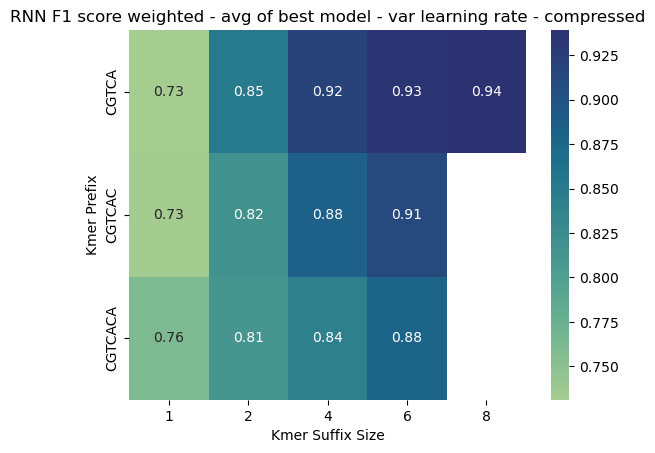

In [112]:

heat = get_avg(id_cols = ["phenotype","model_name","kmer_prefix","kmer_suffix_size","learning_rate"],
               path = "../results/training_RNN_lr_variable_compressed/"
                ).groupby(["phenotype","model_name","kmer_prefix","kmer_suffix_size"], as_index = False
                ).max(["f1_score_weighted"]
                ).pivot(index = "kmer_prefix", columns="kmer_suffix_size", values = "f1_score_weighted").sort_index(level=1, ascending =True, inplace = False)
ax = sns.heatmap(heat, annot = True, cmap="crest")
ax.set(xlabel="Kmer Suffix Size", ylabel="Kmer Prefix", title = "RNN F1 score weighted - avg of best model - var learning rate - compressed")

ax

### Full run

### CNN grid search - uncompressed

In [6]:

heat = get_avg(id_cols = ["phenotype","model_name","kmer_prefix","kmer_suffix_size","learning_rate"],
               path = "../results/CNN/uncompressed"
                ).groupby(["phenotype","model_name","kmer_prefix","kmer_suffix_size"], as_index = False
                ).max(["f1_score_weighted"]
                ).pivot(index = "kmer_prefix", columns="kmer_suffix_size", values = "f1_score_weighted").sort_index(level=1, ascending =True, inplace = False)
ax = sns.heatmap(heat, annot = True, cmap="crest")

ax


len(dir_list)=0


ValueError: No objects to concatenate

### CNN grid search - compressed

len(dir_list)=108


<Axes: title={'center': 'CNN F1 score weighted - avg of best model - var learning rate - compressed'}, xlabel='Kmer Suffix Size', ylabel='Kmer Prefix'>

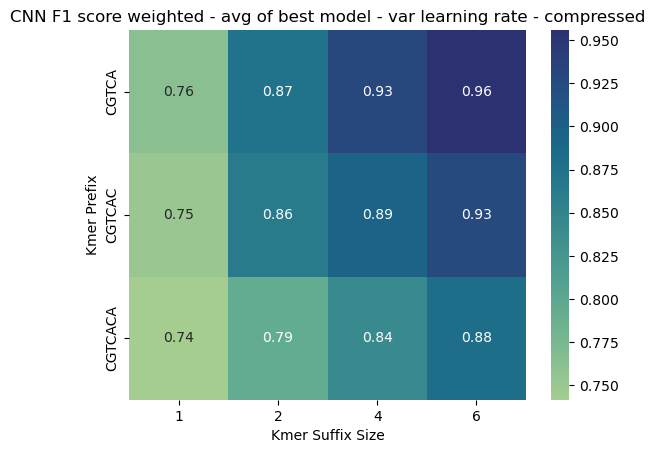

In [7]:

heat = get_avg(id_cols = ["phenotype","model_name","kmer_prefix","kmer_suffix_size","learning_rate"],
               path = "../results/CNN/compressed"
                ).groupby(["phenotype","model_name","kmer_prefix","kmer_suffix_size"], as_index = False
                ).max(["f1_score_weighted"]
                ).pivot(index = "kmer_prefix", columns="kmer_suffix_size", values = "f1_score_weighted").sort_index(level=1, ascending =True, inplace = False)
ax = sns.heatmap(heat, annot = True, cmap="crest")
ax.set(xlabel="Kmer Suffix Size", ylabel="Kmer Prefix", title = "CNN F1 score weighted - avg of best model - var learning rate - compressed")

ax



len(dir_list)=150


<Axes: title={'center': 'RNN F1 score weighted - avg of best model - var learning rate'}, xlabel='Kmer Suffix Size', ylabel='Kmer Prefix'>

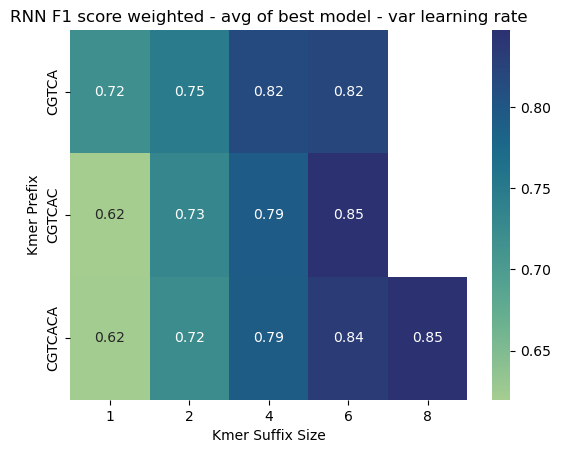

In [9]:
import seaborn as sns
# https://seaborn.pydata.org/generated/seaborn.heatmap.html

# desired: show average accuracy for best learning rate for each combination

heat = get_avg(id_cols = ["phenotype","model_name","kmer_prefix","kmer_suffix_size","learning_rate"],
               path = "../results/RNN/uncompressed"
                ).groupby(["phenotype","model_name","kmer_prefix","kmer_suffix_size"], as_index = False
                ).max(["f1_score_weighted"]
                ).pivot(index = "kmer_prefix", columns="kmer_suffix_size", values = "f1_score_weighted").sort_index(level=1, ascending =True, inplace = False)
ax = sns.heatmap(heat, annot = True, cmap="crest")
ax.set(xlabel="Kmer Suffix Size", ylabel="Kmer Prefix", title = "RNN F1 score weighted - avg of best model - var learning rate")

ax

#diary antuc

len(dir_list)=102


<Axes: title={'center': 'RNN F1 score weighted - avg of best model - var learning rate - compressed'}, xlabel='Kmer Suffix Size', ylabel='Kmer Prefix'>

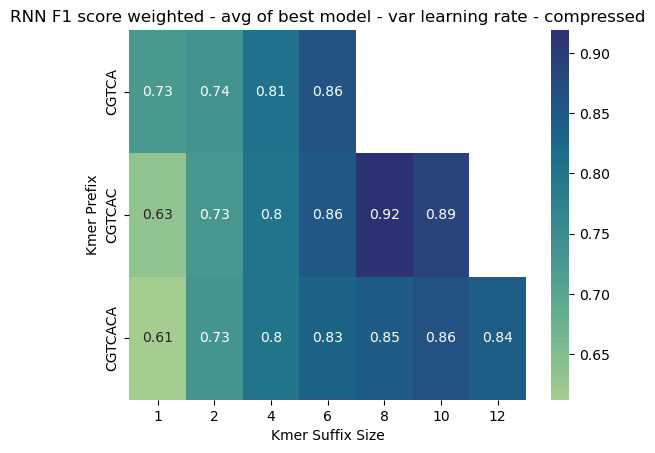

In [8]:

heat = get_avg(id_cols = ["phenotype","model_name","kmer_prefix","kmer_suffix_size","learning_rate"],
               path = "../results/RNN/compressed"
                ).groupby(["phenotype","model_name","kmer_prefix","kmer_suffix_size"], as_index = False
                ).max(["f1_score_weighted"]
                ).pivot(index = "kmer_prefix", columns="kmer_suffix_size", values = "f1_score_weighted").sort_index(level=1, ascending =True, inplace = False)
ax = sns.heatmap(heat, annot = True, cmap="crest")
ax.set(xlabel="Kmer Suffix Size", ylabel="Kmer Prefix", title = "RNN F1 score weighted - avg of best model - var learning rate - compressed")

ax

### Confusion matrices

In [12]:
def confusion_plot(path):
    df = read_series_csv(path)
    
    df = df[["confusion_matrix","int2label","f1_score_weighted"]]
    #print(df)
    print(f'int2label={df["int2label"].iloc[0]}')
    conf = df.confusion_matrix.to_list()[0].split("\n ")
    conf = [[int(i) for i in i.replace("[","]").replace("]","").split()]  for i in conf]



    conf_dict = {d.split(": ")[1]: d.split(": ")[0] for d in df["int2label"].iloc[0].replace("{","").replace("}","").replace("'","").split(", ")}
    print(conf_dict)
    #conf_df = pd.DataFrame.from_dict(conf_dict)
    #conf_df = pd.DataFrame(conf, columns = conf_dict.labels, index = conf_dict.labels)
    #print(conf_df)
    ax = sns.heatmap(conf, annot = True, cmap="crest")
    print(f'{float(df.iloc[0]["f1_score_weighted"])=}, {conf=}')
    

int2label={0: 'negative', 1: 'positive'}
{'negative': '0', 'positive': '1'}
float(df.iloc[0]["f1_score_weighted"])=0.959445037353255, conf=[[1658, 57], [57, 1039]]


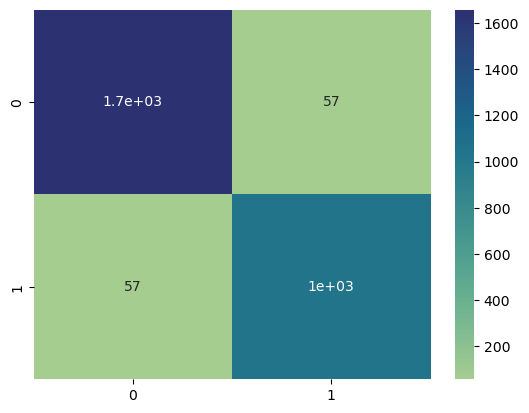

In [24]:
confusion_plot("../results/CNN/compressed/tmp_result_CNN_madin_categorical_gram_stain_COMPRESSED_CGTCA_6_1_0.001.csv")

int2label={0: 'negative', 1: 'positive'}
{'negative': '0', 'positive': '1'}
float(df.iloc[0]["f1_score_weighted"])=0.8894838425316096, conf=[[1590, 125], [184, 912]]


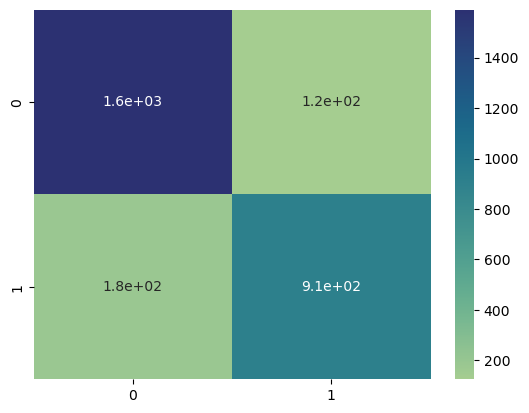

In [21]:
confusion_plot("../results/RNN/compressed/tmp_result_RNN_madin_categorical_gram_stain_COMPRESSED_CGTCA_6_1_0.001.csv")

int2label={0: 'negative', 1: 'positive'}
{'negative': '0', 'positive': '1'}
float(df.iloc[0]["f1_score_weighted"])=0.9311947531404072, conf=[[1607, 83], [110, 1011]]


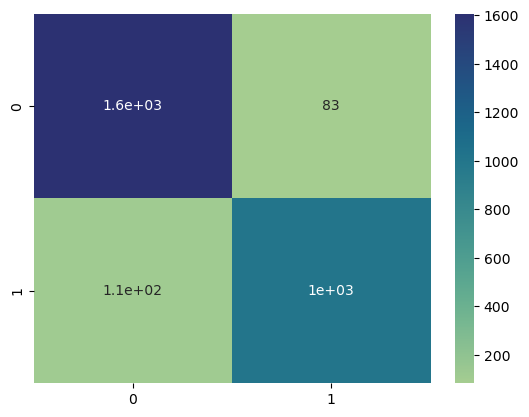

In [20]:
confusion_plot("../results/RNN/compressed/tmp_result_RNN_madin_categorical_gram_stain_COMPRESSED_CGTCAC_8_0_0.001.csv")


### DNA to image

Kmer to rbg image

In [3]:
def read_parquet(parquet_path):
	# Read in as parquet one at a time, kmerize, convert to npy (or parquet?) Then we can stream and potentially use much bigger datasets?
	print(f"Loading parquet dataset: {parquet_path}")
	df = pd.read_parquet(parquet_path, engine = "fastparquet")
	return df

In [21]:
import math
import numpy as np
import matplotlib as plt
from skimage import io
import pandas as pd

def kmer_to_integer(kmer):
    
    m = {'A':0, 'C':1, 'G':2, 'T':3}
    x = 0
    for ch in kmer:
        x = (x << 2) | m[ch]  # multiply by 4 and add digit
    
    return str(x)



def dna2rgb(dna, kmer_size, base_kmer = 4): # kmer_size = 4,8 or 12
    height_width = math.ceil(math.sqrt(len(dna)//kmer_size))
    print(f'{height_width=} x {height_width}')
	
  
    offset = kmer_size//(kmer_size//base_kmer)

    #kmer_ints = [kmer_to_integer(dna[i:i+kmer_size]) for i in range(0, len(dna), kmer_size)]

    # print(kmer_ints)
    # offset = 3
    # RGB = [[kmer[i:i+offset] if kmer[i:i+offset] != "" else "0" for i in range(0, len(kmer),offset)] for kmer in kmer_ints]
    # print(RGB)
    # RGB = np.array(RGB)
    # RGB.reshape((height_width, height_width))

    if 4**kmer_size <= 256:
        datatype = np.uint8
    elif 4**kmer_size <= 2**16:
        datatype = np.uint16
    else:
        datatype = np.uint32

    if kmer_size >= base_kmer:
        # Slice the embeddings
        R = [kmer_to_integer(dna[i:i+offset]) for i in range(0,len(dna),kmer_size)]
        R = np.array(R, dtype=datatype)
        R.resize(height_width*height_width)
        R = R.reshape(height_width,height_width)
        #print(R)
        #R.reshape(height_width, height_width, 1)
        print(R)
        
        if kmer_size == base_kmer:
            G = np.zeros((height_width, height_width), dtype = datatype)
            B = G.copy()
            return np.dstack([R,G,B])
    
    if kmer_size >= base_kmer*2:
        # offset = 8 // (8 // 4) = 4
        
        #R = [kmer_to_integer(dna[i:i+offset]) for i in range(0,len(dna),kmer_size)]
        G = [kmer_to_integer(dna[i+offset:i+offset*2]) for i in range(0,len(dna),kmer_size)]
       
        G = np.array(G, dtype=datatype)
        G.resize(height_width*height_width)
        G = G.reshape(height_width,height_width)
        print(G)
        if kmer_size == base_kmer*2:
            B = np.zeros((height_width, height_width), dtype = datatype)
            return np.dstack([R,G,B])

        
    
    if kmer_size >= base_kmer*3:
        # offset = 12 // (12 // 4) = 4
       
        B = [kmer_to_integer(dna[i+offset*2:i+offset*3]) for i in range(0,len(dna),kmer_size)]
        B = np.array(B, dtype=datatype)
        B.resize(height_width*height_width)
        B = B.reshape(height_width,height_width)
        print(B)

        return np.dstack([R,G,B])

    
    return None  

dna = """TTTTAAAAAGATAGATAACACACTCATCAGTGTGTCAGTCGATCGTAGTATATACGCGATCAGCTAGCTAGCTAGCTGACACACACACATCGCGTAAGGAGATAGATAGACGCATGCATCGATCGA"""



image = dna2rgb(dna, 4, base_kmer=4)

io.imsave('dna.png', image)



height_width=6 x 6
[[255   0  35  35   4  71]
 [ 77  46 237  45 141 178]
 [204 198  99  73 201 201]
 [201 225  17  17  54 108]
 [ 40 140 140 134  78  77]
 [141   8   0   0   0   0]]


In [8]:
df = read_parquet("../downloads/train_01.parquet")

Loading parquet dataset: ../downloads/train_01.parquet


In [ ]:
print(df.iloc[0].dna_sequence)

GGCAAGGCGGCGAAGGCAGGCAAGACGGCCAGAACCGCGCGCAAGGTCGCGCCGGCGGTGAAGCGCAGGGGCTGCAACAGCTTTGAGCAGGGCACCGAGG


In [78]:
for i in range(len(df)):
    image = dna2rgb(df.iloc[i].dna_sequence.replace(" ","").replace("N",""), 4, base_kmer=4)
    io.imsave(f'parq_{i}.png', image)


height_width=836 x 836
[[164  41 166 ...  88 144 164]
 [185 173 182 ...  69 155  91]
 [151 144 171 ...  93  38   8]
 ...
 [102  54 101 ... 219  93 134]
 [239 119 104 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
height_width=810 x 810
[[233 190 186 ...  14  52 139]
 [172 253   4 ...  97  24 158]
 [ 24  65  78 ... 182 112 169]
 ...
 [ 28 174 217 ... 248 229 149]
 [184 129 244 ...   5  64 192]
 [222  63  70 ...   0   0   0]]
height_width=801 x 801
[[169 148 108 ...  75 218  62]
 [ 43 121   7 ...  96  45 160]
 [114 225  89 ... 167  70  27]
 ...
 [ 55 160 100 ... 157 129 249]
 [139 150  42 ... 229 101  29]
 [111  93  52 ...   0   0   0]]
height_width=810 x 810
[[125 138 202 ... 214  26  62]
 [194  68 107 ... 101 161 139]
 [ 54 125 234 ... 135 102  57]
 ...
 [103  79  73 ... 100 105 154]
 [ 68 145 138 ... 185   4 166]
 [249 237 233 ...   0   0   0]]
height_width=905 x 905
[[ 27 123  22 ... 163  62  98]
 [107 158 254 ... 148  40 239]
 [111 215 163 ... 141  31  74]
 ...
 [165 214 230 ... 1

KeyError: 'Y'